In [1]:
import pytesseract as pt
import sys
import os
import cv2
import numpy as np
from Footage_Capture import get_workfolder
from matplotlib import pyplot as plt

path = get_workfolder()
tempnum = 0

class Enhance_Image():

    def frame_to_grayscale(frame_path):
        grayscale_frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
        return grayscale_frame

    def crop_frame(frame, x0, y0, x1, y1):
        cropped_frame = frame[y0:y1, x0:x1]
        return cropped_frame

    def enhance_image(frame):
        enhanced = cv2.inRange(frame, 210, 255)
        global tempnum
        cv2.imwrite('./test%d.png' % tempnum, frame)
        tempnum += 1
        return enhanced


class Parse_Data():

    def __init__(self, folder_name, start_frame, finish_frame, fps=30):
        self.folder_name = folder_name
        self.start_frame = start_frame
        self.finish_frame = finish_frame
        self.fps = fps
        self.speed_list = []

    def get_path(self, frame_number):
        frame_path = path + self.folder_name + '//'[:-1] + \
            self.folder_name + 'frame_' + str(frame_number) + '.jpg'
        return frame_path

    def _get_speed(self, frame):
        text = pytesseract.image_to_string(frame)
        return text

    # def get_grayscales(self):
    #     grayscales = []
    #     for frame_number in range(self.start_frame, self.finish_frame):
    #         path = self.get_path(frame_number)
    #         grayscales.append(Enhance_Image.frame_to_grayscale(path))
    #     return grayscales

    # def get_cropped(self, grayscales, x0, y0, x1, y1):
    #     cropped = [Enhance_Image.crop_frame(
    #         frame, x0, y0, x1, y1) for frame in grayscales]
    #     return cropped

    def get_list_of_speeds(self):
        for x in range(self.start_frame, self.finish_frame):
            path = self.get_path(x)
            grayscale = Enhance_Image.frame_to_grayscale(path)
            cropped = Enhance_Image.crop_frame(grayscale, 130, 496, 283, 554)
            cropped = Enhance_Image.enhance_image(cropped)
            self.speed_list.append(self._get_speed(cropped))

    def output_to_file(self):
        log = open('./log.txt', 'w')
        if self.speed_list:
            for entry in self.speed_list:
                log.write(entry + '\n')
                
def temp_path(position, driver, gp, frame_num):
    temp = position + '_' + driver + '_' + gp
    path = const + temp + '//'[:-1] + temp + 'frame_' + str(frame_num) + '.jpg'
    return path


In [2]:
temp = 'P01_Leclerc_Russia'
Leclerc = Parse_Data(temp, 400, 500, fps=50)
const = r'/home/german/Downloads/F1/'
temp_arg = temp.split('_')
lec = temp_path(*temp_arg, 775)
input_frame = Enhance_Image.frame_to_grayscale(lec)

321


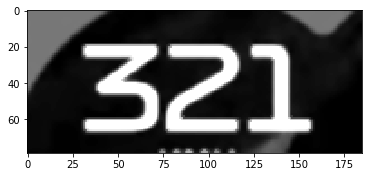

In [3]:
%matplotlib inline
cropped_frame = Enhance_Image.crop_frame(input_frame, 115, 483, 300, 562)
bil = cv2.GaussianBlur(cropped_frame, (5,5), 0)
blur = cv2.medianBlur(bil, 3)*1.7-65
plt.imshow(blur, vmin=0, vmax = 255, cmap='gray')
pr_bil = pt.image_to_string(blur)
print(pr_bil)

In [6]:
for k in range(100):
    lec = temp_path(*temp_arg, (k+1)*50)
    input_frame = Enhance_Image.frame_to_grayscale(lec)
    cropped_frame = Enhance_Image.crop_frame(input_frame, 115, 483, 300, 562)
    gaussblur = cv2.GaussianBlur(cropped_frame, (5,5), 0)
    medblur = cv2.medianBlur(gaussblur, 7)*1.7-55
    pr_med = pt.image_to_string(cropped_frame, lang = 'Formula1')
    print(pr_med)

131
108
128
17.9
Z;l,9
ZgG
263
275
284
294
304
308
3.13
31.7
320
323
323
319
128
139
16.4
ZOB
233

267


285
286
ZS,O
286
191
129
Z;.I,O
235
257
ZGB
ZZ:I.
:I.G:l.
153
188
Zu:lÄ.ng
Zgz
ZGZ
ZZO
Z13
188
Z18
245
ZG:I.
ZOG
:l.e:l.
Z;l,7
243
257

:I.ZG
ZI.G:I.
195
Z31
257
ZB,O
294
305

32.0
326
329
328
320
Zz7
131
:l.gG
123
141
136
:I.GG
Zg4
233
ZI.GO
1:.L5
110
:l.g-Z
:l.gz
168
Zg8
236
2.57
ZgG
ZI.GO
146
186
15,3
125
131
1Z4
2.1.7
244
263
ZZS


In [5]:
?cv2.medianBlur